In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
register_matplotlib_converters()
from time import time

In [ ]:
def parser(s):
    dt_object = datetime.strptime(s, "%m/%d/%Y %H:%M")
    formatted_dt_string = dt_object.strftime("%m/%d/%Y %I:%M:%S %p")
    return formatted_dt_string

In [ ]:
df =  pd.read_csv('/content/drive/MyDrive/data.csv', parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
df.head(10)

<ipython-input-4-136666c4293e>:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  df =  pd.read_csv('/content/drive/MyDrive/data.csv', parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)


,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
time,,,,,,
2017-01-01 00:00:00,867.63,910.42,-189.54,-186.04,852.13,-145.9
2017-01-01 00:05:00,879.23,918.14,-184.33,-182.1,862.53,-149.76
2017-01-01 00:10:00,875.67,924.18,-181.26,-166.47,866.06,-145.01
2017-01-01 00:15:00,875.28,923.15,-179.15,-174.83,865.85,-142.82
2017-01-01 00:20:00,891.66,934.26,-178.32,-173.72,876.06,-143.39
2017-01-01 00:25:00,878.54,932.38,-188.37,-177.98,870.31,-146.92
2017-01-01 00:30:00,905.94,951.32,-184.2,-182.67,889.39,-151.83
2017-01-01 00:35:00,877.83,939.63,-184.2,-181.17,875.75,-149.7
2017-01-01 00:40:00,871.01,938.73,-184.2,-181.17,871.35,-145.62


In [ ]:
df

,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
time,,,,,,
2017-01-01 00:00:00,867.63,910.42,-189.54,-186.04,852.13,-145.9
2017-01-01 00:05:00,879.23,918.14,-184.33,-182.1,862.53,-149.76
2017-01-01 00:10:00,875.67,924.18,-181.26,-166.47,866.06,-145.01
2017-01-01 00:15:00,875.28,923.15,-179.15,-174.83,865.85,-142.82
2017-01-01 00:20:00,891.66,934.26,-178.32,-173.72,876.06,-143.39
...,...,...,...,...,...,...
2020-08-07 11:55:00,899.42,919.79,-224.07,-209.77,901.01,-175.15
2020-08-07 12:00:00,879.9,895.02,-228.04,-211.28,878.08,-176.94
2020-08-07 12:05:00,887.2,895.7,-230.11,-214.65,885.32,-179.18


In [ ]:
df.isnull()

,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
time,,,,,,
2017-01-01 00:00:00,False,False,False,False,False,False
2017-01-01 00:05:00,False,False,False,False,False,False
2017-01-01 00:10:00,False,False,False,False,False,False
2017-01-01 00:15:00,False,False,False,False,False,False
2017-01-01 00:20:00,False,False,False,False,False,False
...,...,...,...,...,...,...
2020-08-07 11:55:00,False,False,False,False,False,False
2020-08-07 12:00:00,False,False,False,False,False,False
2020-08-07 12:05:00,False,False,False,False,False,False


In [ ]:
print(df.dtypes)

Cyclone_Inlet_Gas_Temp      object
Cyclone_Material_Temp       object
Cyclone_Outlet_Gas_draft    object
Cyclone_cone_draft          object
Cyclone_Gas_Outlet_Temp     object
Cyclone_Inlet_Draft         object
dtype: object


In [ ]:
df=df.convert_dtypes()

In [ ]:
columns_of_interest = ['Cyclone_Inlet_Gas_Temp', 'Cyclone_Material_Temp', 'Cyclone_Outlet_Gas_draft',
                       'Cyclone_cone_draft', 'Cyclone_Gas_Outlet_Temp', 'Cyclone_Inlet_Draft']
df[columns_of_interest] = df[columns_of_interest].apply(pd.to_numeric, errors='coerce')

In [ ]:
df_copy = df.copy()

In [ ]:
c=df_copy.asfreq(pd.infer_freq(df_copy.index))

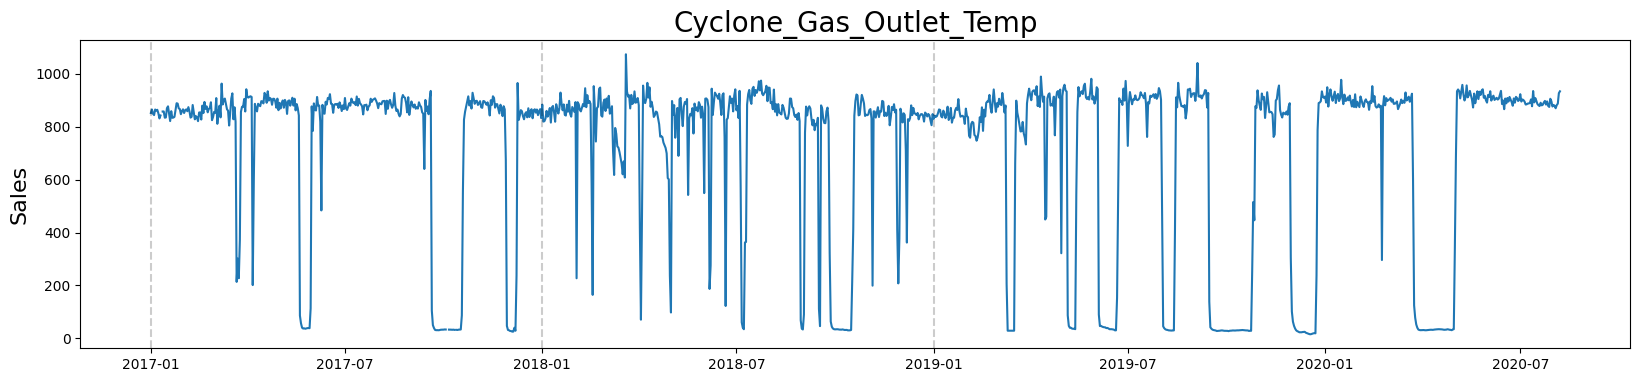

In [ ]:
plt.figure(figsize=(20,4))
plt.plot(c['Cyclone_Gas_Outlet_Temp'])
plt.title('Cyclone_Gas_Outlet_Temp', fontsize=20)
plt.ylabel('Sales', fontsize=16)
for year in range(2017,2020):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

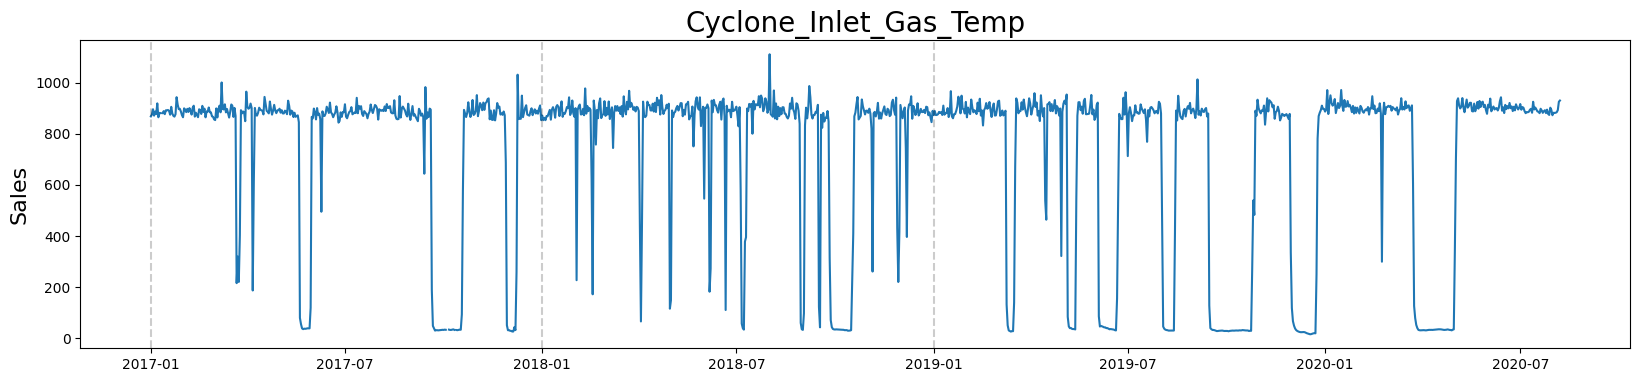

In [ ]:
plt.figure(figsize=(20,4))
plt.plot(c['Cyclone_Inlet_Gas_Temp'])
plt.title('Cyclone_Inlet_Gas_Temp', fontsize=20)
plt.ylabel('Sales', fontsize=16)
for year in range(2017,2020):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

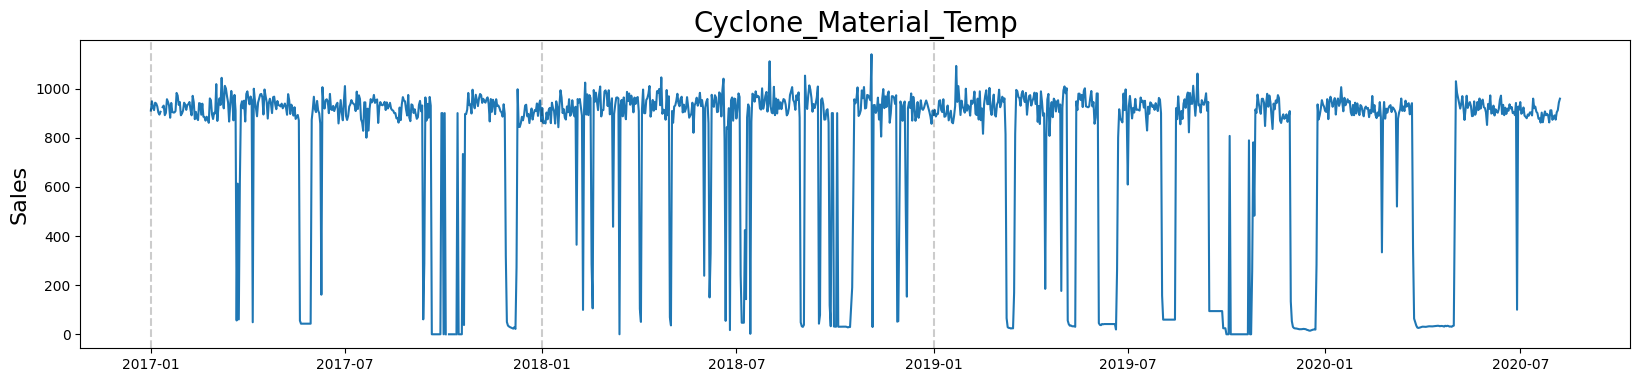

In [ ]:
plt.figure(figsize=(20,4))
plt.plot(c['Cyclone_Material_Temp'])
plt.title('Cyclone_Material_Temp', fontsize=20)
plt.ylabel('Sales', fontsize=16)
for year in range(2017,2020):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

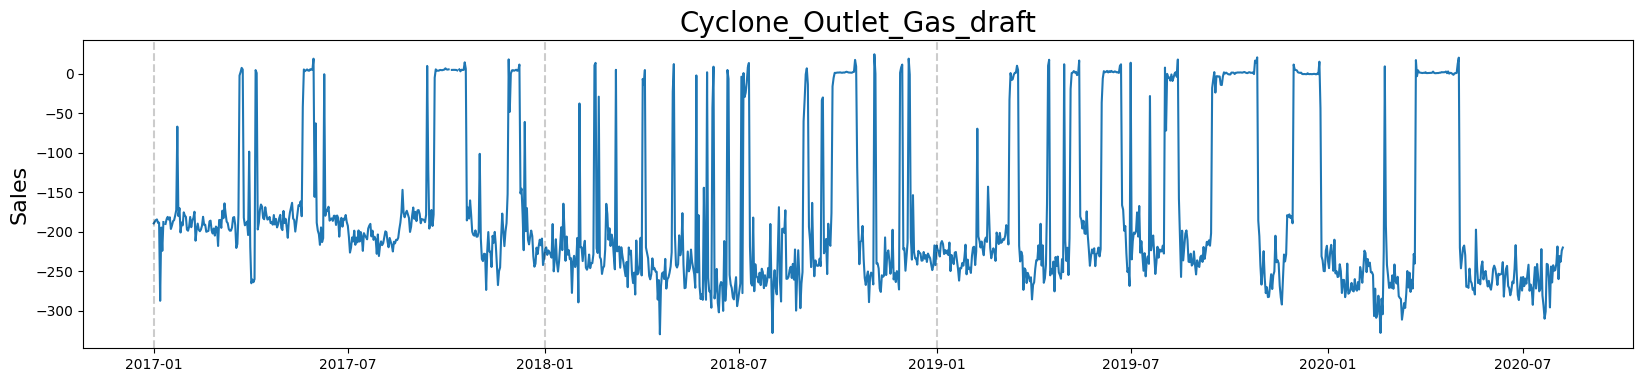

In [ ]:
plt.figure(figsize=(20,4))
plt.plot(c['Cyclone_Outlet_Gas_draft'])
plt.title('Cyclone_Outlet_Gas_draft', fontsize=20)
plt.ylabel('Sales', fontsize=16)
for year in range(2017,2020):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

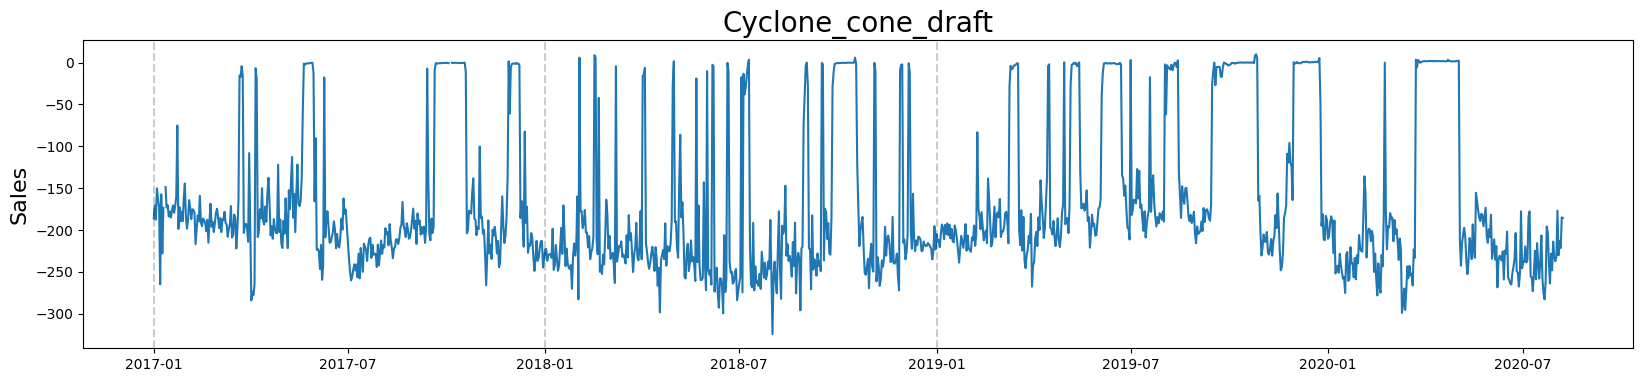

In [ ]:
plt.figure(figsize=(20,4))
plt.plot(c['Cyclone_cone_draft'])
plt.title('Cyclone_cone_draft', fontsize=20)
plt.ylabel('Sales', fontsize=16)
for year in range(2017,2020):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

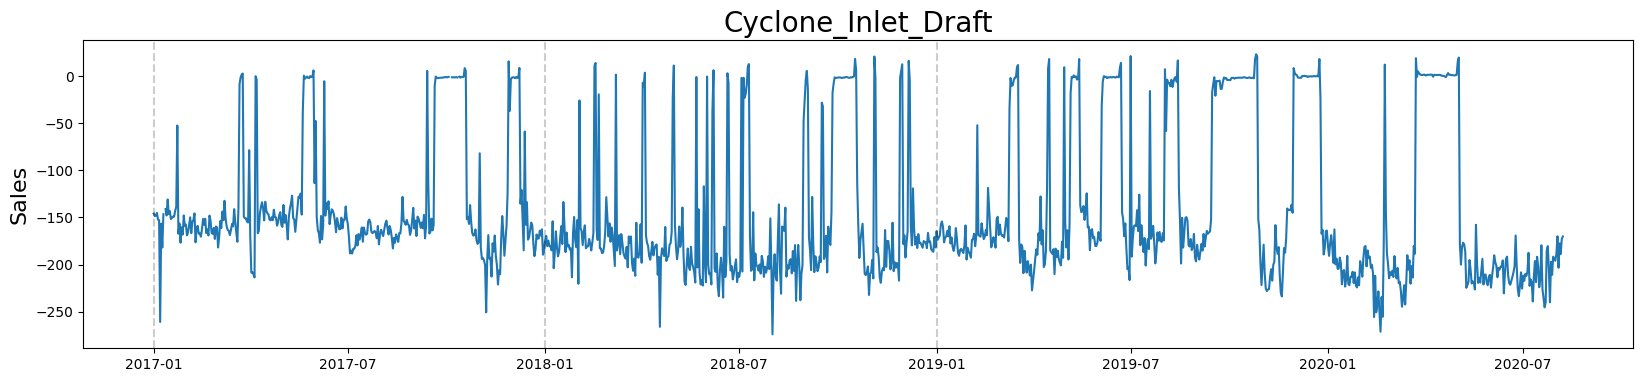

In [ ]:

plt.figure(figsize=(20,4))
plt.plot(c['Cyclone_Inlet_Draft'])
plt.title('Cyclone_Inlet_Draft', fontsize=20)
plt.ylabel('Sales', fontsize=16)
for year in range(2017,2020):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [ ]:
import pandas as pd
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:


ic = df_copy.asfreq(pd.infer_freq(df_copy.index))
ic = ic.interpolate(method='linear')

In [ ]:
def st(i):
  stl = STL(ic[i])

  result = stl.fit()
  seasonal, trend, resid = result.seasonal, result.trend, result.resid
  plt.figure(figsize=(8,6))

  plt.subplot(4,1,1)
  plt.plot(ic[i])
  plt.title('STL for '+i, fontsize=20)


  plt.subplot(4,1,2)
  plt.plot(trend)
  plt.title('Trend', fontsize=16)

  plt.subplot(4,1,3)
  plt.plot(seasonal)
  plt.title('Seasonal', fontsize=16)

  plt.subplot(4,1,4)
  plt.plot(resid)
  plt.title('Residual', fontsize=16)

  plt.tight_layout()

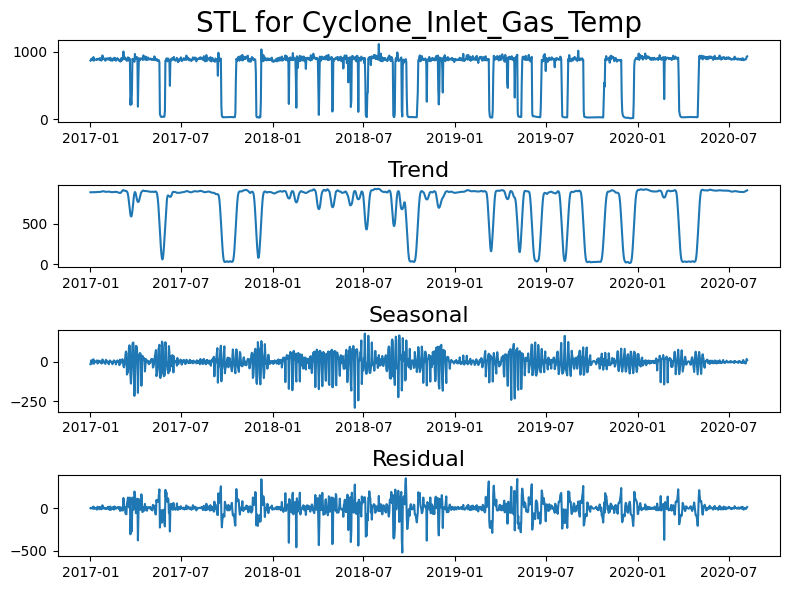

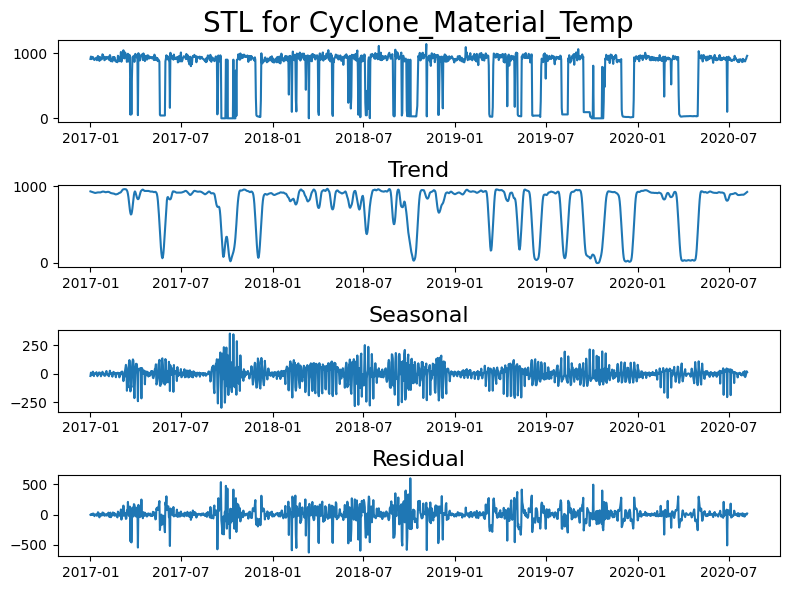

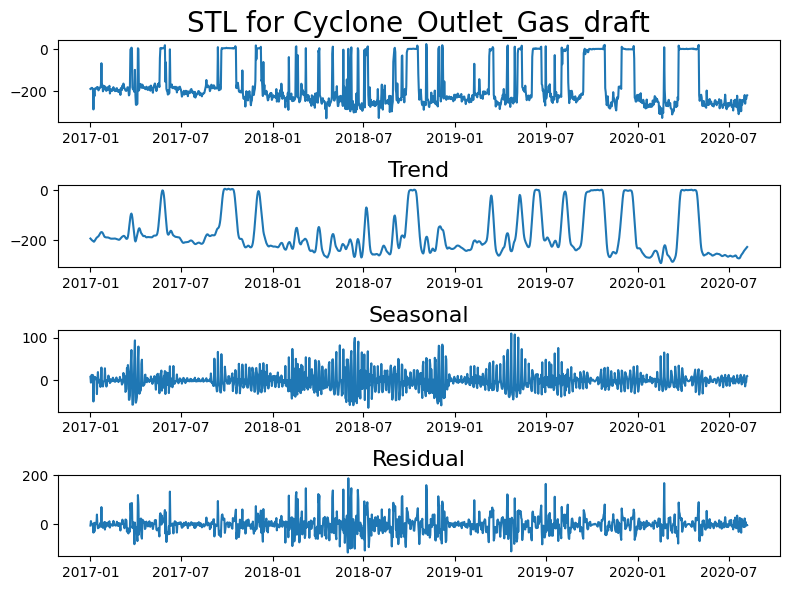

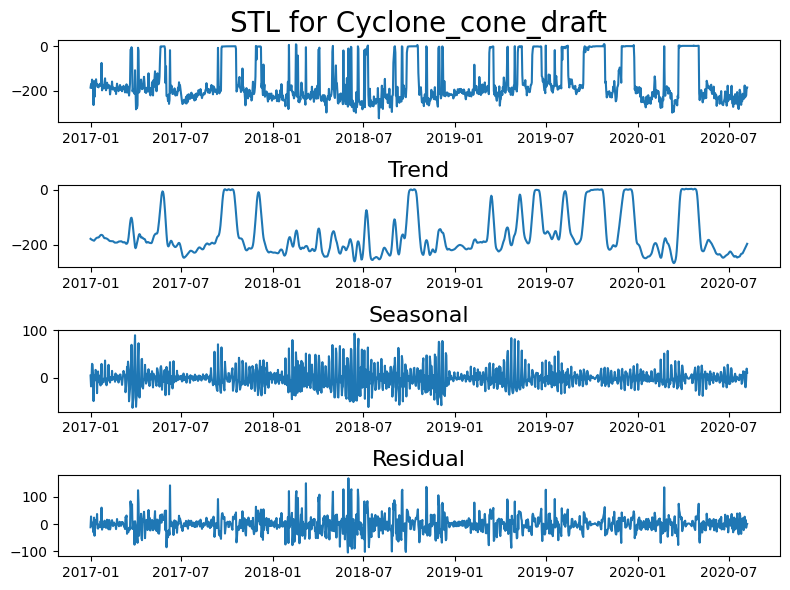

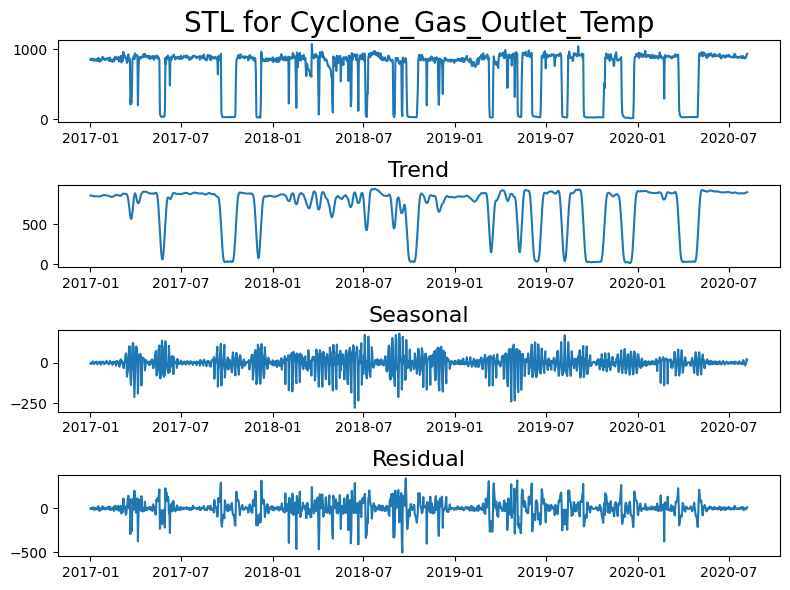

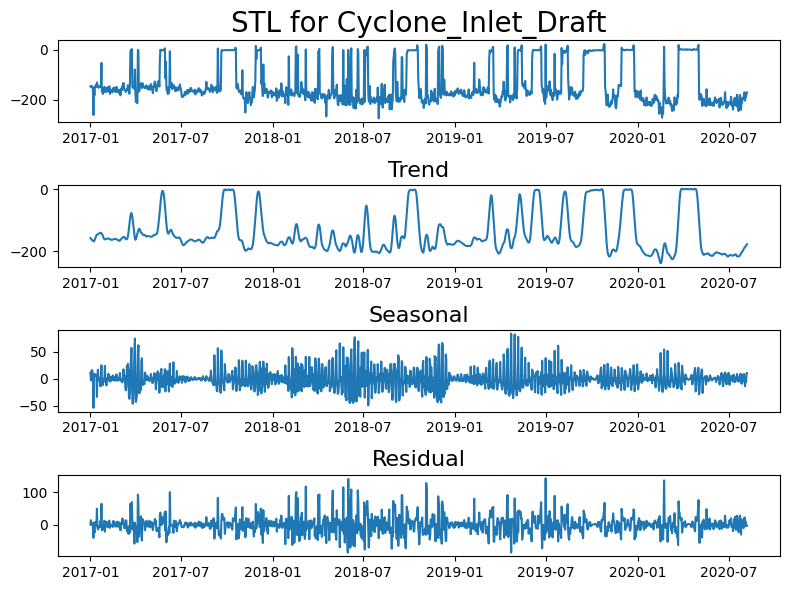

In [ ]:
for j in columns_of_interest:
   st(j)

In [ ]:
def ano(i):
  stl = STL(ic[i])

  result = stl.fit()
  seasonal, trend, resid = result.seasonal, result.trend, result.resid
  resid_mu = resid.mean()
  resid_dev = resid.std()

  lower = resid_mu - 3*resid_dev
  upper = resid_mu + 3*resid_dev
  plt.figure(figsize=(20,4))
  plt.plot(resid)
  plt.title(i)
  plt.fill_between([datetime(2017,1,1), datetime(2020,8,7)], lower, upper, color='g', alpha=0.25, linestyle='--', linewidth=2)

  anomalies = ic[i][(resid < lower) | (resid > upper)]

  plt.figure(figsize=(20,4))
  plt.title(i+" Anomalies")
  plt.plot(ic[i])
  for year in range(2017,2020):
      plt.axvline(datetime(year,1,1), color='k', linestyle='--', alpha=0.5)

  plt.scatter(anomalies.index, anomalies.values, color='r', marker='D')



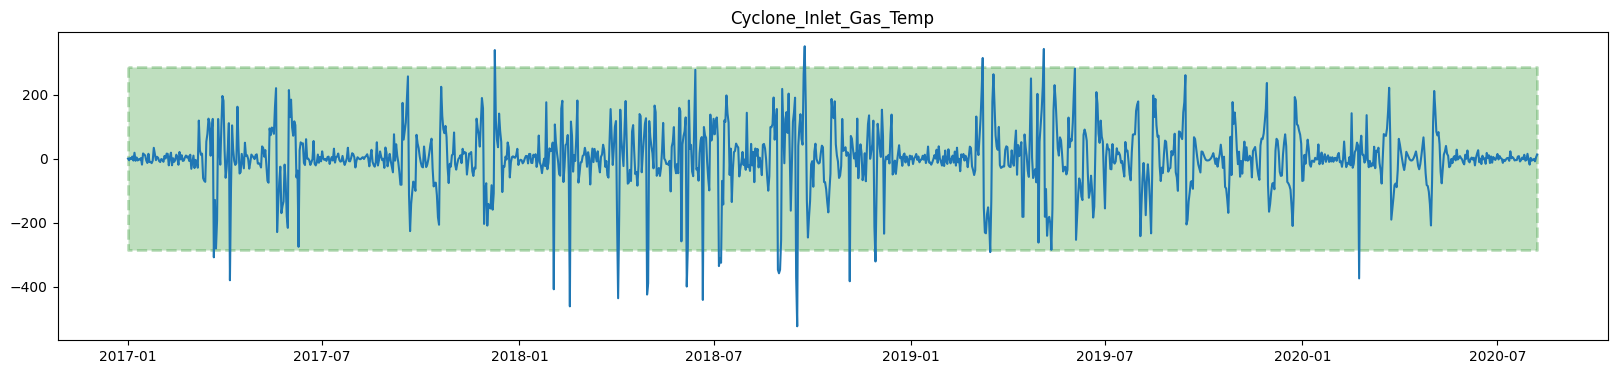

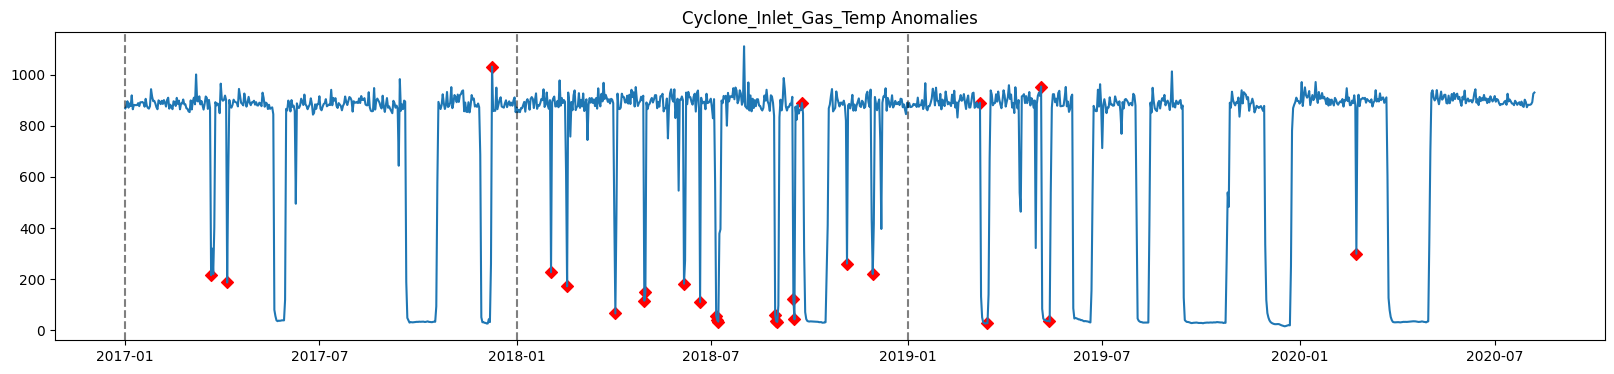

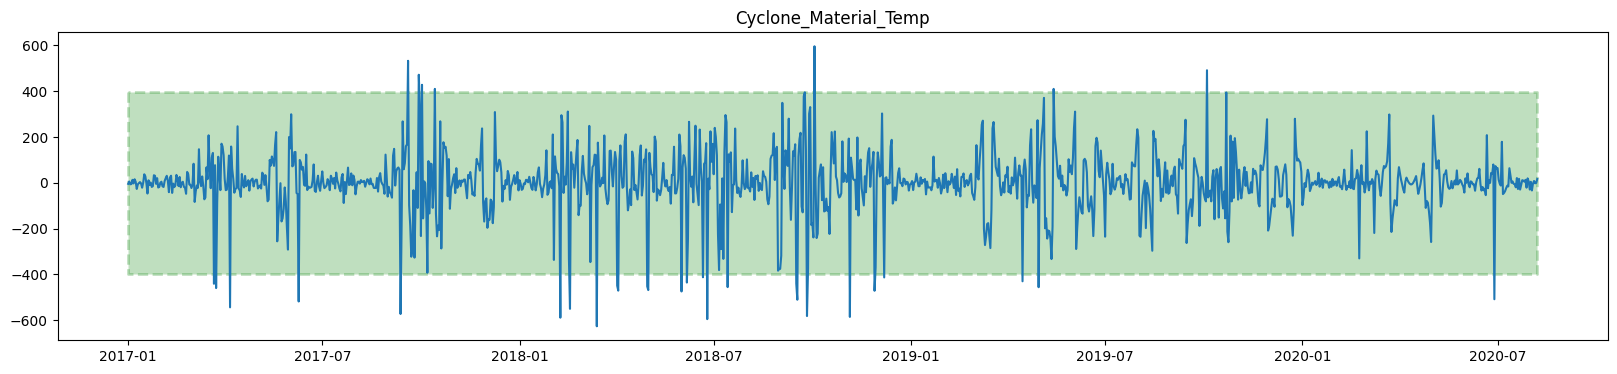

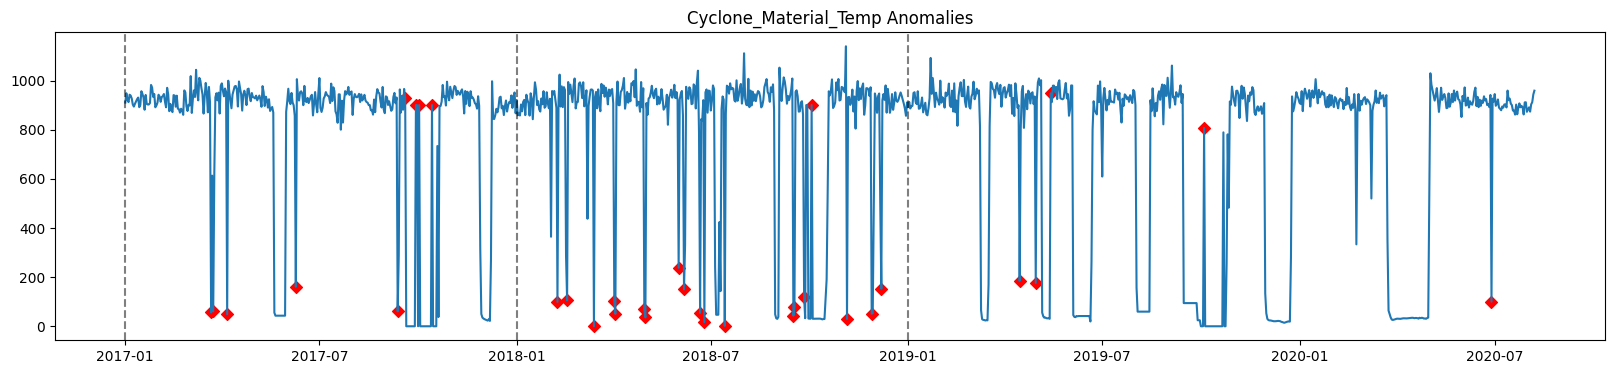

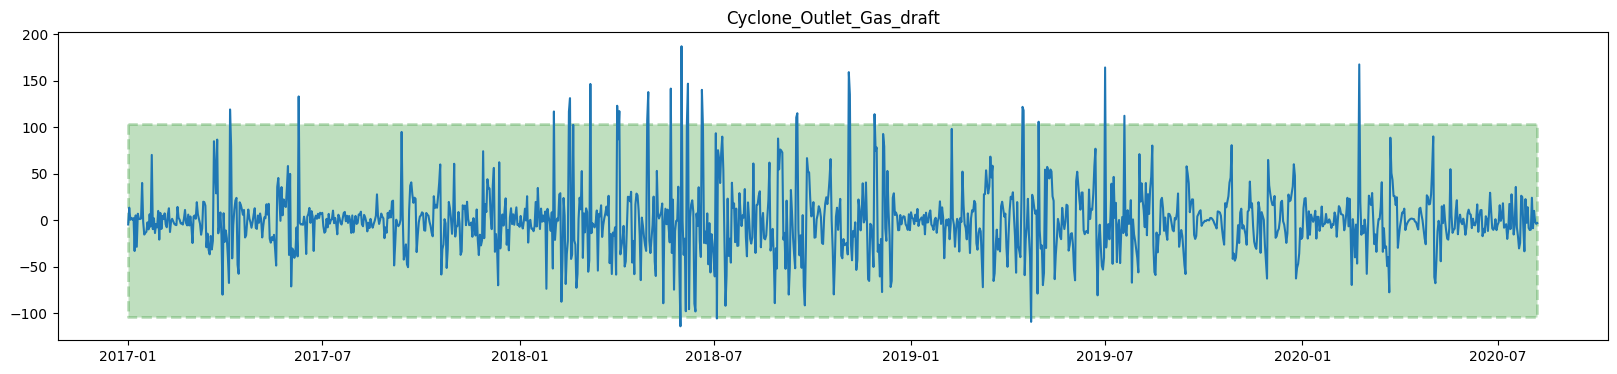

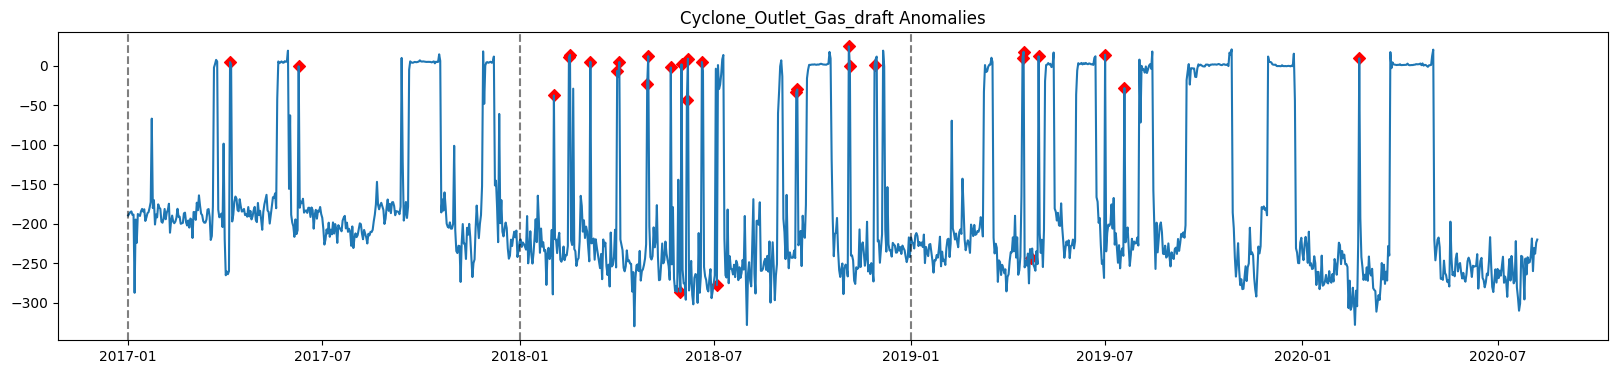

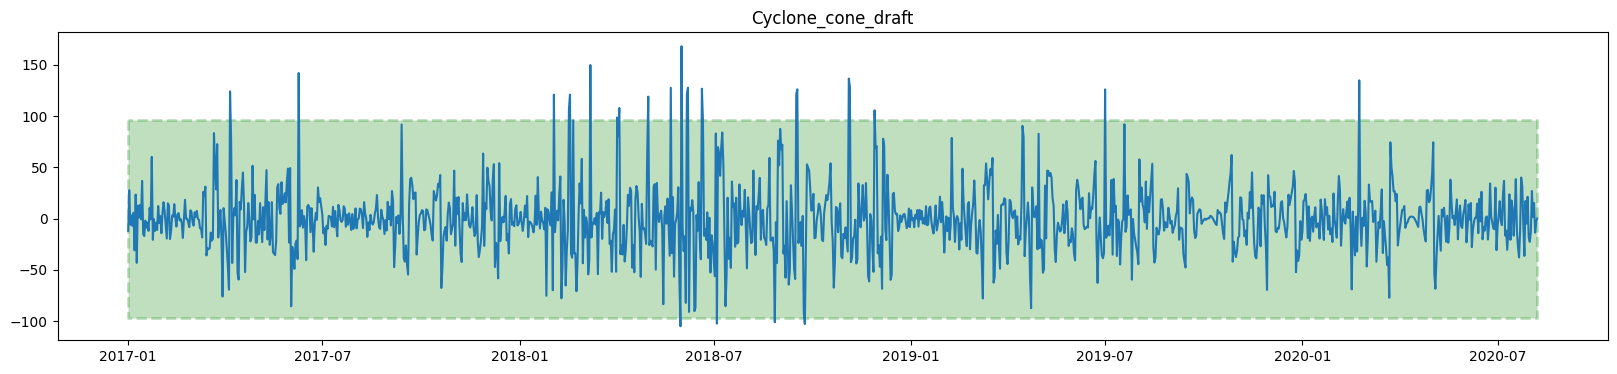

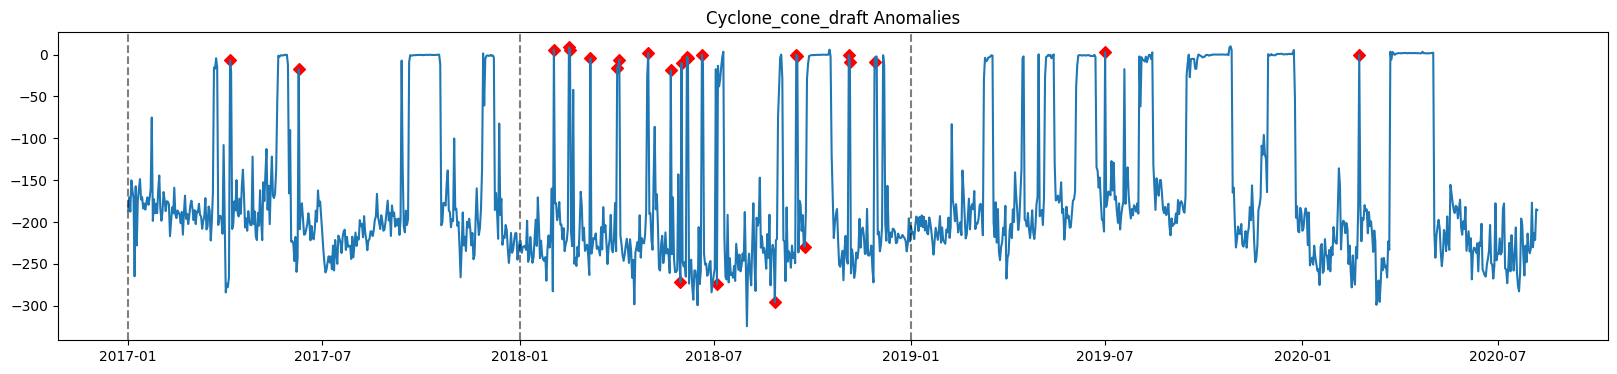

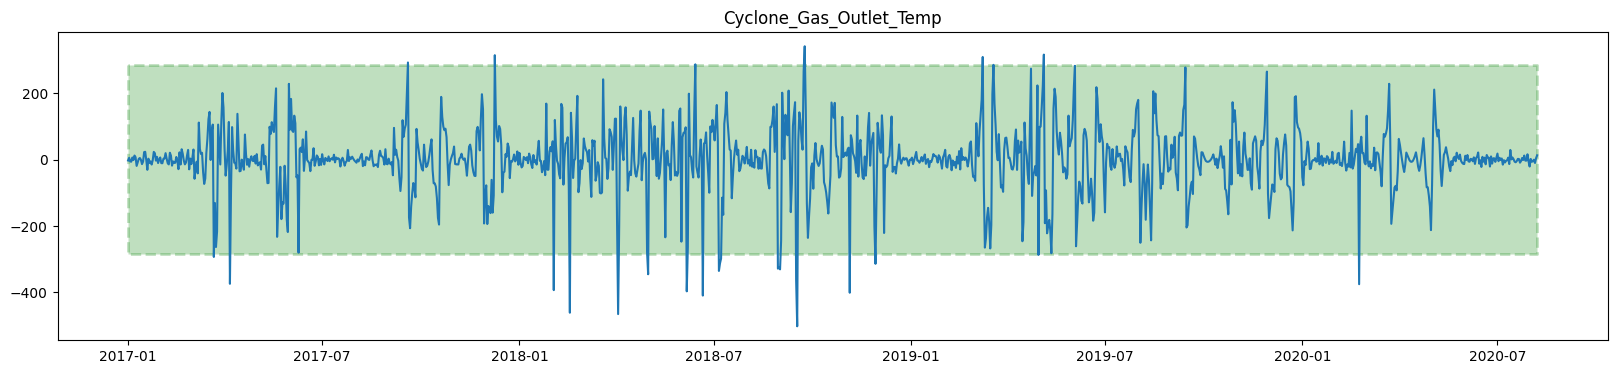

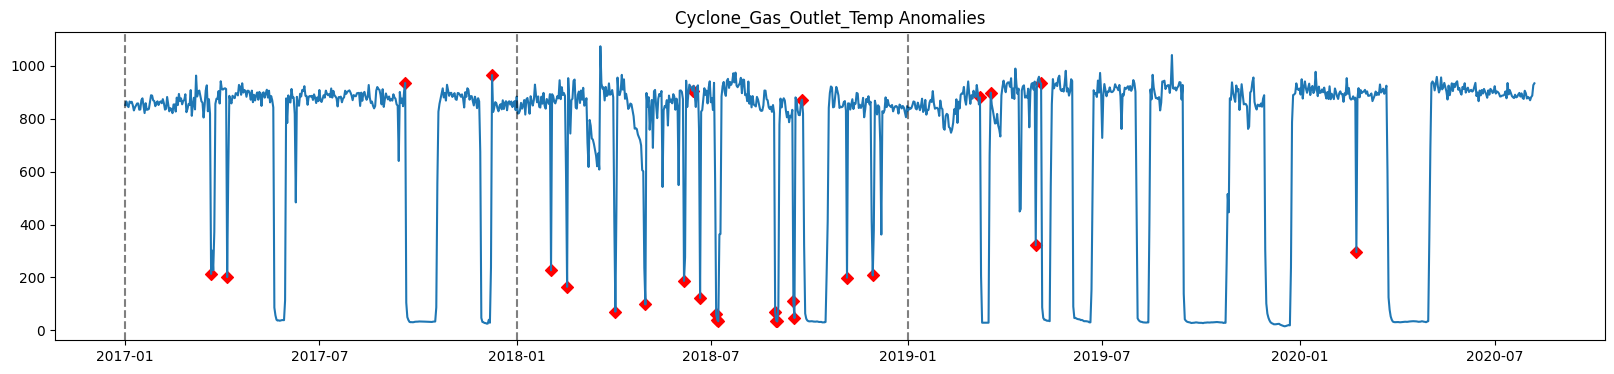

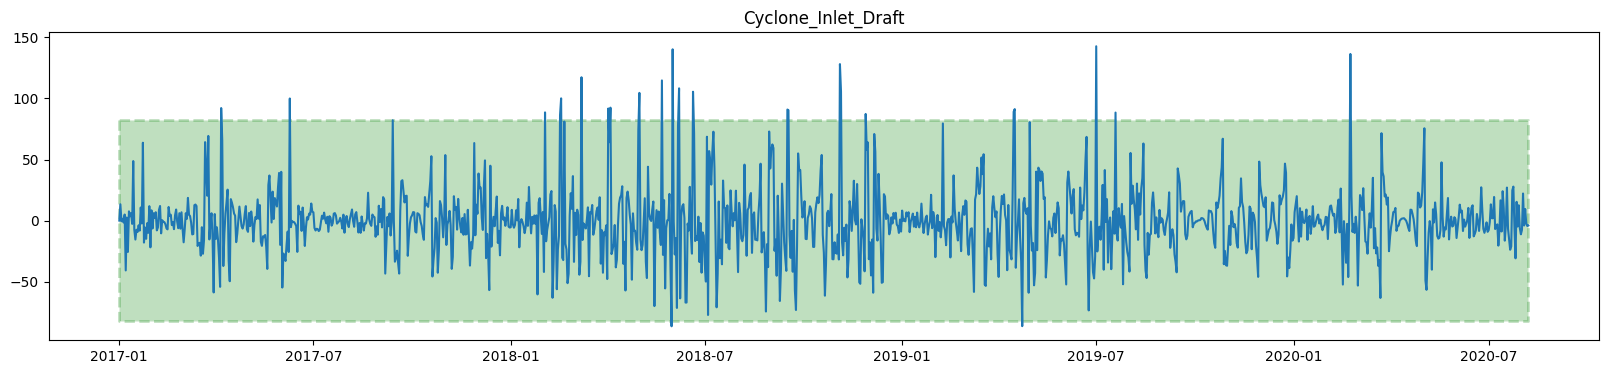

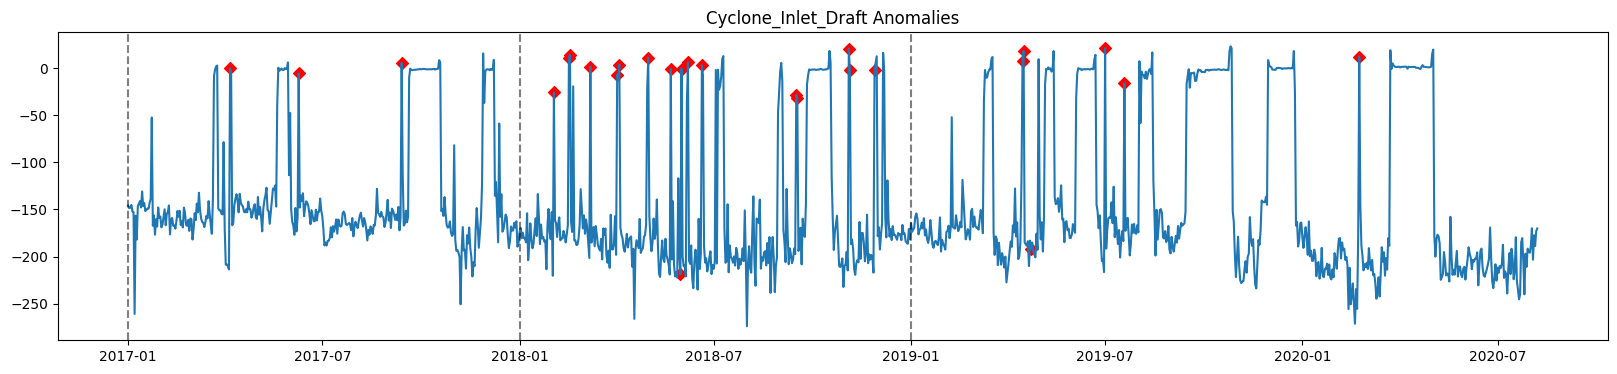

In [ ]:
for j in columns_of_interest:
   ano(j)